# Tarea 4: Pruebas de hipótesis

Solución de los ejercicios de la sección `Pruebas de hipótesis` del libro del curos [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/pruebas-de-hip%C3%B3tesis.html)

# Pruebas visuales y permutación

## Pruebas de permutación

El siguiente video es bastante claro sobre lo que hace una [prueba de permutación](https://www.youtube.com/watch?v=rJ3AZCQuiLw)

La tabla de datos `Phillies2009.csv`  contiene información de la temporada de baseball 2009 para el equipo de Philadelphia Phillies, en este ejercicio queremos comparar los strikes (`StrikeOuts`) entre los juegos en casa y de visitante.

### Carga de datos

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as plt
import matplotlib.pyplot as plt

from utils import ordenar_tendencia_central, tabla_prueba_permutacion

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros']

In [4]:
#Se obtiene dataset original
file_path = "datos\\Phillies2009.csv"
phillies = pd.read_csv(os.path.join(path_asignatura, file_path))
phillies.head()

,Date,Location,Outcome,Hits,Doubles,HomeRuns,StrikeOuts
0,5-Apr,Home,Lose,4,2,0,6
1,7-Apr,Home,Lose,6,1,0,3
2,8-Apr,Home,Win,11,3,1,6
3,10-Apr,Away,Lose,7,2,1,3
4,11-Apr,Away,Win,15,3,1,6


In [5]:
print(f"Dimensiones del conjunto de datos: {phillies.shape}")

Dimensiones del conjunto de datos: (162, 7)


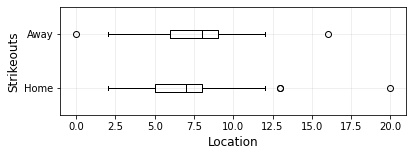

In [6]:
#Se ordena el dataset con respecto a la mediana
ordenar_tendencia_central(phillies, 'Location', 'StrikeOuts', mo='median')

#Graficamos todo el conjunto de datos
ax = phillies.boxplot(by='Location', column='StrikeOuts', figsize=(6,2), vert=False, color='black')
ax.set_title('')
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("Strikeouts", fontsize=12)
ax.grid(alpha=0.25)

plt.suptitle('')
plt.show()

### Ejercicio 1
Realiza un lineup donde cada panel muestre un diagrama de caja y brazos para la variable de interés separando los juegos jugados en casa (`home`) y los juegos jugados fuera (`away`). ¿Puedes localizar los datos verdaderos entre los nulos?

In [7]:
agrupadora = 'Location'
permutadora = 'StrikeOuts'

perm_df = tabla_prueba_permutacion(phillies, agrupadora, permutadora)
perm_df

,Location,StrikeOuts,12,17,18,13,6,16,5,7,...,15,11,1,0,8,3,14,2,9,4
0,Home,6,10,2,2,10,9,8,8,7,...,5,8,6,7,8,5,8,4,11,9
1,Home,3,9,8,4,8,8,9,4,8,...,5,6,4,4,8,6,6,6,8,6
2,Home,6,5,6,8,9,3,20,9,8,...,4,9,10,8,9,20,8,10,7,2
3,Away,3,6,4,7,3,6,13,8,10,...,6,13,4,10,7,6,6,2,2,9
4,Away,6,8,5,7,7,7,6,4,7,...,11,7,9,4,4,8,16,6,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Home,2,8,4,6,6,7,9,12,9,...,6,6,3,10,4,6,4,9,9,6
158,Home,8,0,7,9,8,9,6,9,9,...,9,9,7,9,8,8,10,4,4,11
159,Home,4,7,5,10,7,5,7,5,9,...,10,2,9,3,7,10,3,10,5,6
160,Home,4,3,4,6,12,4,8,8,4,...,13,5,6,8,4,9,7,6,4,7


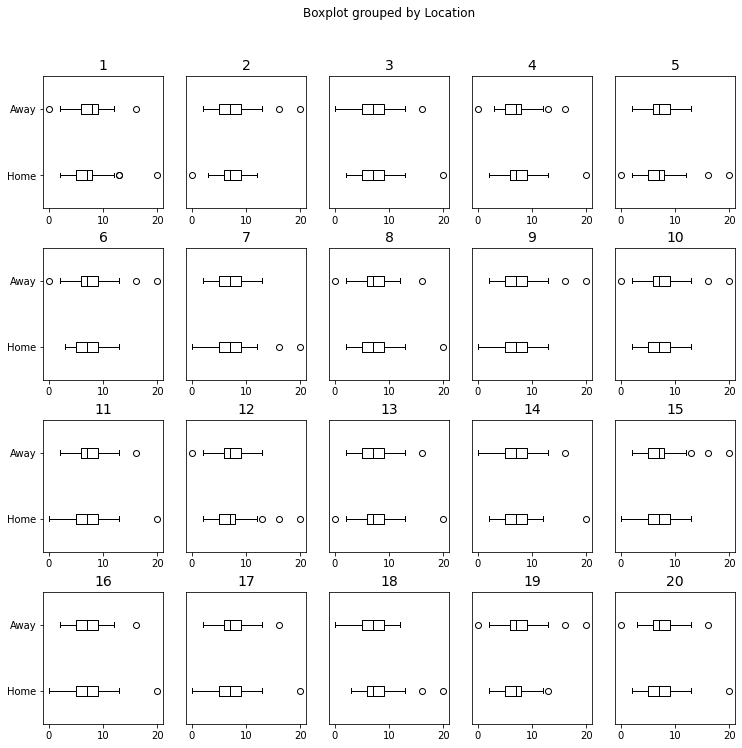

In [8]:
fig = plt.figure(figsize=(12,12))
spec = plt.GridSpec(ncols=5, nrows=4, hspace=0.3)

#Paneles
for i in np.arange(1,21):
    ax_n = f"ax{i}"
    ax_n = fig.add_subplot(spec[i-1])
    perm_df.boxplot(by=agrupadora, column=perm_df.columns[i], vert=False, color='black', ax=ax_n)
    ax_n.set_title(i, fontsize=14)
    ax_n.set_xlabel('')
    ax_n.grid(False)
    
    if (i-1)%5 != 0:
        ax_n.set_yticks([])

plt.show()

Yo no puedo identificar los datos verdaderos.

### Ejercicio 2
Calcula el promedio de strikes por juego en cada grupo (donde grupo se define por Location).

In [9]:
#Se obtiene dataset original
file_path = "datos\\Phillies2009.csv"
phillies = pd.read_csv(os.path.join(path_asignatura, file_path))
phillies.head()

,Date,Location,Outcome,Hits,Doubles,HomeRuns,StrikeOuts
0,5-Apr,Home,Lose,4,2,0,6
1,7-Apr,Home,Lose,6,1,0,3
2,8-Apr,Home,Win,11,3,1,6
3,10-Apr,Away,Lose,7,2,1,3
4,11-Apr,Away,Win,15,3,1,6


In [10]:
phillies.groupby(by='Location').mean()[['StrikeOuts']]

,StrikeOuts
Location,
Away,7.308642
Home,6.950617


### Ejercicio 3
Realiza una prueba de permutación para la diferencia de las medias. Grafica la
distribución de referencia y calcula el valor $p$ de dos colas.

Método para cálculo de diferencia de medias obtenido de [Practical Statistics for Data Science, O'Reilly](https://github.com/gedeck/practical-statistics-for-data-scientists)

In [11]:
import random

In [12]:
mean_a = phillies[phillies['Location'] == 'Home']['StrikeOuts'].mean()
mean_b = phillies[phillies['Location'] == 'Away']['StrikeOuts'].mean()
print(mean_b - mean_a)

0.3580246913580245


In [13]:
# Prueba de permutación para diferencia de medias
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()#, idx_A, idx_B
    
nA = phillies[phillies['Location'] == 'Home'].shape[0]
nB = phillies[phillies['Location'] == 'Away'].shape[0]

perm_fun(phillies['StrikeOuts'], nA, nB)

1.3703703703703702

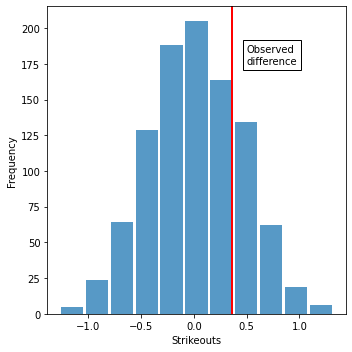

In [14]:
#Ejecutando 1,000 iteraciones
n = 1_000
random.seed(1)
perm_diffs = [perm_fun(phillies['StrikeOuts'], nA, nB) for _ in range(n)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9, alpha=0.75)
ax.axvline(x = mean_b - mean_a, color='red', lw=2)
ax.text(0.5, 175, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Strikeouts')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

$p_{val}=\frac{card(TS_{P}>TS_{OBS})}{card(p)}$

Siendo:
* $TS_P$: Permutation Test Statistic
* $TS_{OBS}$: Observed Test Statistic

In [15]:
print(f"p-val: {sum(perm_diffs > (mean_b - mean_a)) / n}")

p-val: 0.221


# Pruebas pareadas

El siguiente video es bastante claro sobre lo que hace una [prueba de permutación](https://www.youtube.com/watch?v=3e6ZM-oWwbM)

En este ejemplo buscamos comparar la diferencia entre dos medicinas para dormir.
* `ID` es el identificador de paciente, y `medicina_1` y `medicina_2` son las horas extras de sueño vs. no usar medicina.
* Examina los datos.

In [16]:
#Se obtiene dataset original
file_path = "datos\\dormir.csv"
dormir = pd.read_csv(os.path.join(path_asignatura, file_path), usecols=['ID','medicina_1','medicina_2'])
dormir

,ID,medicina_1,medicina_2
0,1,0.7,1.9
1,2,-1.6,0.8
2,3,-0.2,1.1
3,4,-1.2,0.1
4,5,-0.1,-0.1
5,6,3.4,4.4
6,7,3.7,5.5
7,8,0.8,1.6
8,9,0.0,4.6
9,10,2.0,3.4


La pregunta de interés es si una medicina es mejor que otra para prolongar el sueño. Nótese que en este caso no tenemos grupos, sino mediciones repetidas.
* Escribe la hipótesis nula.
<br> Ambas medicinas producen el mismo efecto en el sueño.

* Nuestra estadística de interés es media de las diferencias entre las medicinas. Calcula la diferencia observada.
* Hay variación entre los pacientes. ¿Tenemos evidencia para rechazar que son iguales? ¿Cómo hacemos nuestra distribución de referencia?
* Haz una gráfica de la distribución de referencia y grafica encima el valor observado en los datos originales.
* Calcula el valor p (justifica porque a una o dos colas).

In [17]:
dormir['diferencia'] = dormir['medicina_1'] - dormir['medicina_2']
dormir

,ID,medicina_1,medicina_2,diferencia
0,1,0.7,1.9,-1.2
1,2,-1.6,0.8,-2.4
2,3,-0.2,1.1,-1.3
3,4,-1.2,0.1,-1.3
4,5,-0.1,-0.1,0.0
5,6,3.4,4.4,-1.0
6,7,3.7,5.5,-1.8
7,8,0.8,1.6,-0.8
8,9,0.0,4.6,-4.6
9,10,2.0,3.4,-1.4


In [18]:
print(f"Diferencia observada: {dormir['diferencia'].mean()}")

Diferencia observada: -1.58


In [19]:
k = 1_000
diferencia_medias = np.zeros(shape=(k))

for i in range(k):
    #Vector de cambio de signo para permutaciones
    vect_signo = np.ones(shape=(dormir.shape[0]))
    for n in range(dormir.shape[0]):
        flag = np.random.random()
        if flag <= 0.5: vect_signo[n] = -1

        #Se permuta la columnas de diferencias y se calcula la media
        diferencia_medias[i] = (dormir['diferencia'] * vect_signo).mean()

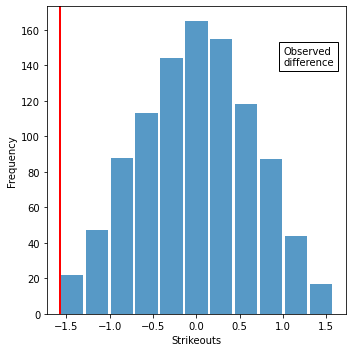

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(diferencia_medias, bins=11, rwidth=0.9, alpha=0.75)
ax.axvline(x = dormir['diferencia'].mean(), color='red', lw=2)
ax.text(1, 140, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Strikeouts')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
print(f"p-val: {sum(diferencia_medias > dormir['diferencia'].mean()) / k}")

p-val: 0.997


Dada la distribución anterior, calculada con **1,000** permutaciones de los datos, se obtuvo un valor $p=997$, lo cual nos da evidencia suficiente para rechazar la hipótesis nula, es decir, las medicinas no producen el mismo efecto en el sueño

---